## Time independent Schrodinger equation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [2]:
L = 10
Nx = 1000
x = np.linspace(0, L, Nx+1)
h = (L-0)/(Nx)

Ne = 10000
E = np.linspace(0, 10, Ne+1)

s = 10e-8

### Functions

In [3]:
#Numerov propagator
def prop(y, c, E):
    for i in range(2, Nx+1):
        y[i] = [(10*h**2*-2*(E-c[i-1])+24)*y[i-1]+(-2*(E-c[i-2])*h**2-12)*y[i-2]]/(12+2*(E-c[i])*h**2)
    return y

In [4]:
#Get the Psi(L) with sliding energy
def get_y_end(y, c):
    y_end = np.zeros(Ne+1)
    for j in range(Ne+1):
        y_end[j] = prop(y, c, E[j])[-1] 
    return y_end

In [5]:
#Bisection method
def bis(k, s, y, c):
    a = E[k]
    b = E[k+1]
    err = b-a
    while (err > s):
        f_a = prop(y, c, a)[-1]
        f_b = prop(y, c, b)[-1]
        if f_a*f_b < 0:
            d = (b+a)/2
            f_d = prop(y, c, d)[-1]
            if f_a*f_d < 0:
                b = d
            elif f_d*f_b < 0:
                a = d
            else:
                print("Error")
        err = b-a
    return (b+a)/2

In [6]:
def get_zeros(y_end):
    zeros = []
    for k in range(Ne):
        if y_end[k]*y_end[k+1] < 0:
            zeros.append(k)
    return zeros

In [7]:
def solve_eigenequation(zeros, y, c, s):
    eigenvalue = []
    eigenvector = []

    for k in range(len(zeros)):
        z = bis(zeros[k], s, y, c)
        eigenvalue.append(z)
        psi = prop(y, c, z)
        eigenvector.append(psi/np.sum(psi**2))

    eigenvalue = np.array(eigenvalue)
    eigenvector = np.array(eigenvector)
    
    return eigenvalue, eigenvector

### Solving for different potentials

In [33]:
#Box potential
c1 = np.zeros((Nx+1))

#Rectangular potential barrier
a = 3
b = 7
V0 = 2
c2 = np.zeros((Nx+1))
c2[(x>a) & (x<b)] = V0

#Harmonic potential
k = 1
c3 = (x-0.5*L)**2*k

potentials = [c1, c2, c3]
potentials_names = ["Box", "Rectangular barrier", "Harmonic"]

In [22]:
%%time
y_end_values = []
eigenvalues = []
eigenvectors = []

for c in potentials:
  #Slide energy
  y = np.zeros((Nx+1))
  y[1] = 1

  y_end = get_y_end(y, c)
  y_end_values.append(y_end)

  #Solve eigen-equation
  zeros = get_zeros(y_end)
  eigenvalue, eigenvector = solve_eigenequation(zeros, y, c, s)
  eigenvalues.append(eigenvalue)
  eigenvectors.append(eigenvector)

CPU times: user 3min 14s, sys: 426 ms, total: 3min 14s
Wall time: 3min 16s


CPU times: user 383 ms, sys: 971 µs, total: 384 ms
Wall time: 444 ms


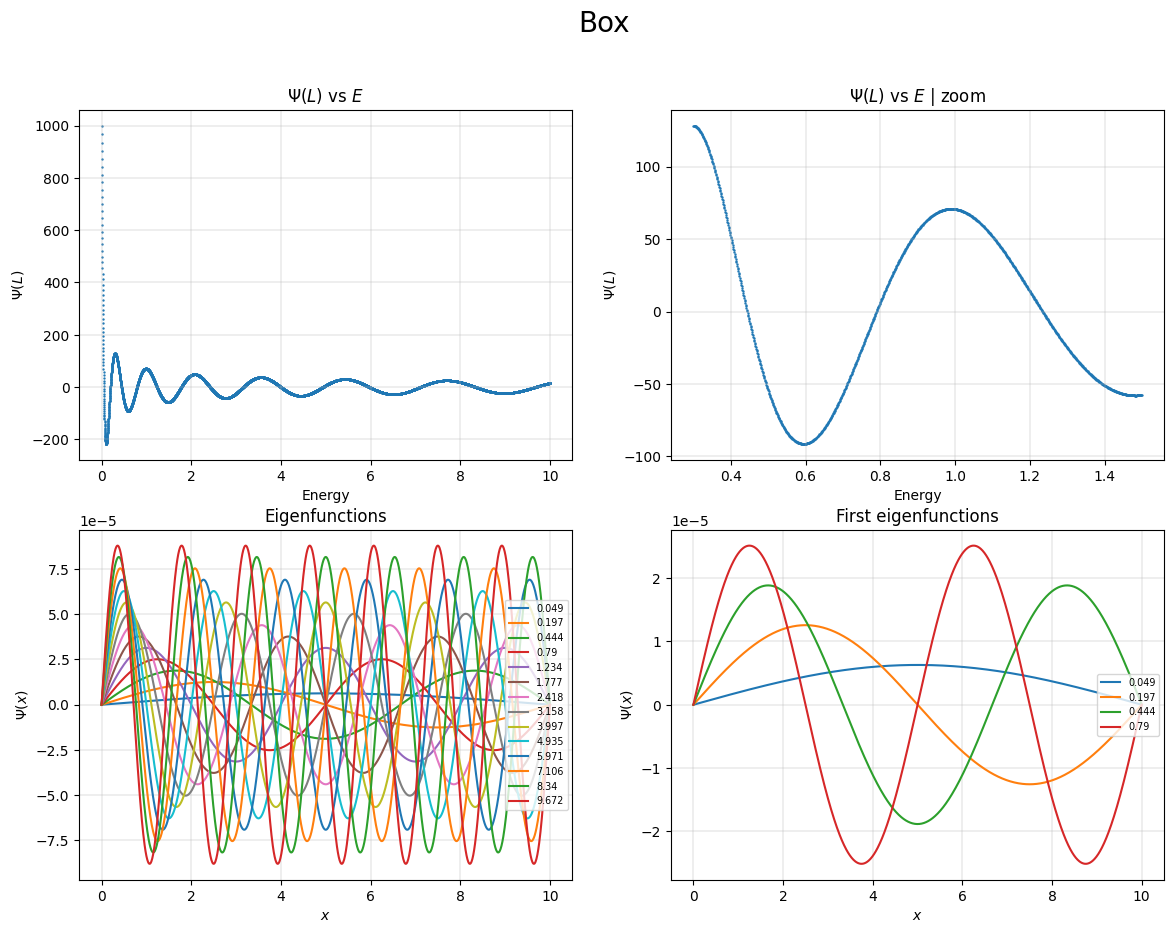

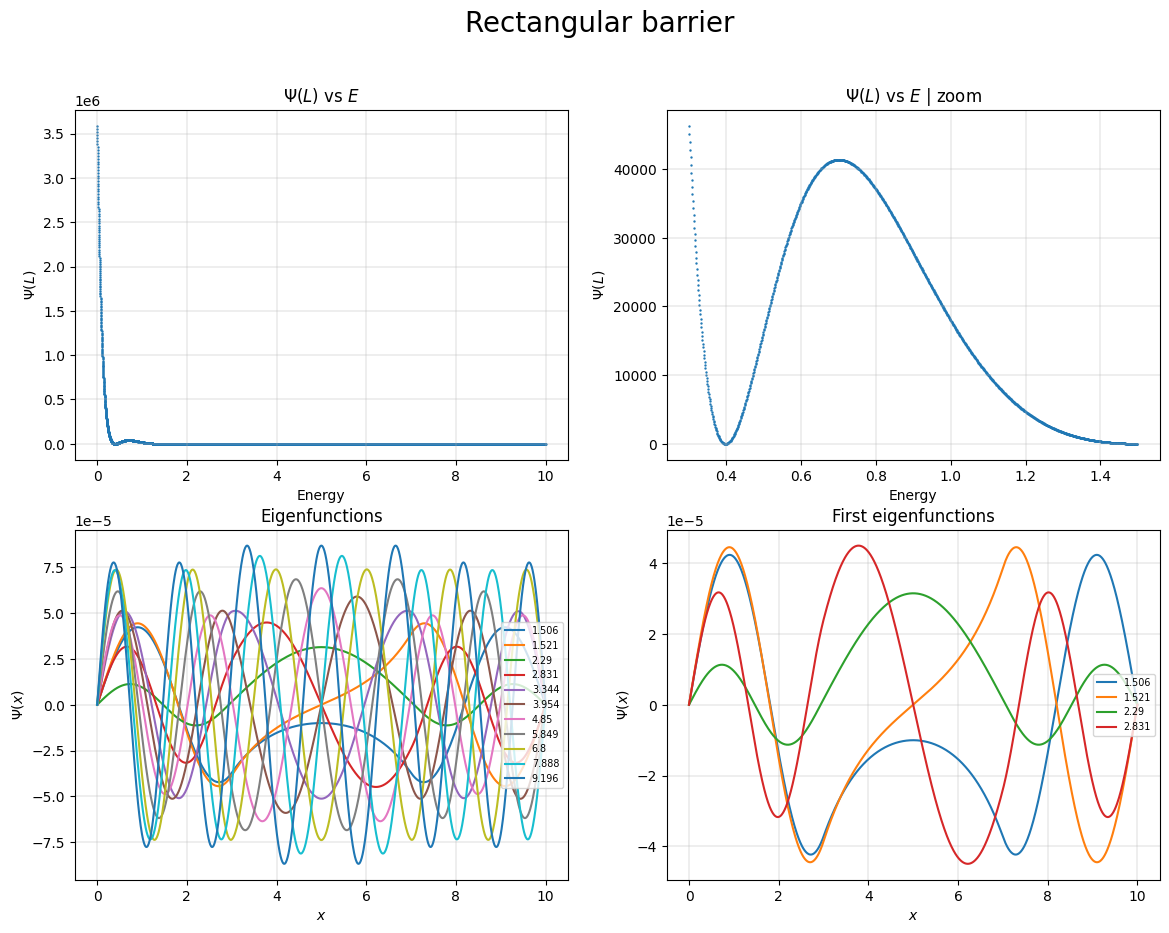

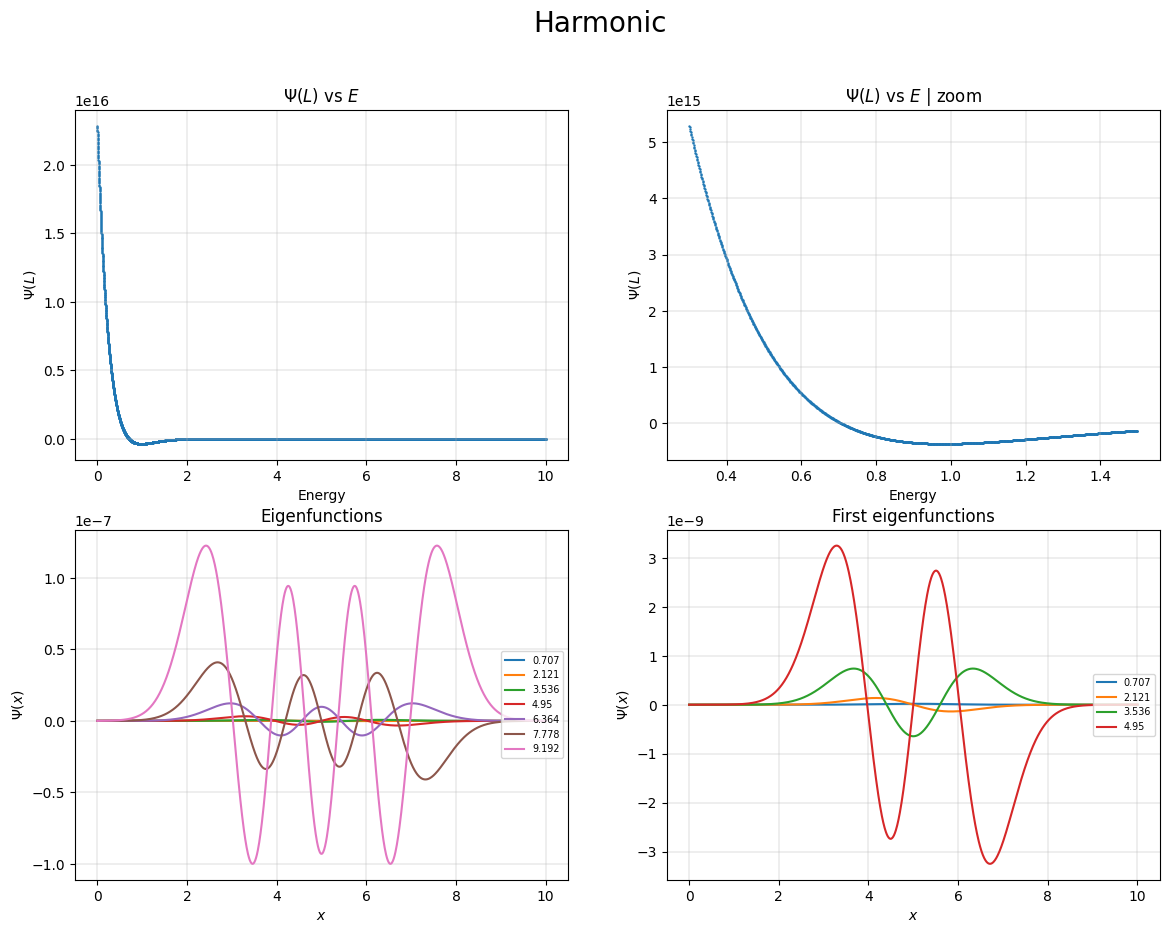

In [42]:
%%time
for i in range(3):
  y_end = y_end_values[i]
  eigenvalue = eigenvalues[i]
  eigenvector = eigenvectors[i]
  name = potentials_names[i]


  plt.figure(figsize=(14, 10))
  plt.suptitle(name, fontsize=20)

    
  plt.subplot(221)
  plt.grid(linestyle='-', linewidth=0.3)
  plt.xlabel("Energy")
  plt.ylabel("$\Psi(L)$")
  plt.title("$\Psi(L)$ vs $E$")
  plt.scatter(E, y_end, s=0.5)

  plt.subplot(222)
  plt.grid(linestyle='-', linewidth=0.3)
  plt.xlabel("Energy")
  plt.ylabel("$\Psi(L)$")
  plt.title("$\Psi(L)$ vs $E$ | zoom")
  plt.scatter(E[300:1500], y_end[300:1500], s=0.5)


  plt.subplot(223)
  plt.title("Eigenfunctions")
  plt.grid(linestyle='-', linewidth=0.3)
  plt.xlabel("$x$")
  plt.ylabel("$\Psi(x)$")
  for i in range(len(eigenvalue)):
      plt.plot(x, eigenvector[i], label=str(round(eigenvalue[i], 3)))
  plt.legend(fontsize="x-small", loc="right")

  plt.subplot(224)
  plt.title("First eigenfunctions")
  plt.grid(linestyle='-', linewidth=0.3)
  plt.xlabel("$x$")
  plt.ylabel("$\Psi(x)$")
  for i in range(4):
      plt.plot(x, eigenvector[i], label=str(round(eigenvalue[i], 3)))
  plt.legend(fontsize="x-small", loc="right")